In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#imoprting file
from google.colab import files
uploaded = files.upload()

Saving train_loan.csv to train_loan (2).csv


In [68]:
#Reading File Path
data=pd.read_csv('/content/train_loan.csv')

In [ ]:
#Checking Columns
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#Missing Values

In [ ]:
# Check for missing values
print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# Handle missing values
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

<ipython-input-26-0b452e26ce4c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
<ipython-input-26-0b452e26ce4c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

#Encoding


In [ ]:
data.dtypes

,0
Loan_ID,object
Dependents,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Loan_Status,object
Gender_Female,bool
Gender_Male,bool


In [ ]:
data['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['Loan_ID']=le.fit_transform(data['Loan_ID'])

In [ ]:
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,5849,0.0,146.412162,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True
1,1,1,4583,1508.0,128.000000,360.0,1.0,N,False,True,False,True,True,False,True,False,True,False,False
2,2,0,3000,0.0,66.000000,360.0,1.0,Y,False,True,False,True,True,False,False,True,False,False,True
3,3,0,2583,2358.0,120.000000,360.0,1.0,Y,False,True,False,True,False,True,True,False,False,False,True
4,4,0,6000,0.0,141.000000,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True


In [ ]:
#onehot encoding
data = pd.get_dummies(data,dtype = int)

In [ ]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,146.412162,360.0,1.0,False,True,True,False,...,False,False,False,True,1,0,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,False,True,False,True,...,False,True,False,False,0,1,0,0,1,0
2,2,3000,0.0,66.000000,360.0,1.0,False,True,False,True,...,True,False,False,True,1,0,0,0,0,1
3,3,2583,2358.0,120.000000,360.0,1.0,False,True,False,True,...,False,False,False,True,1,0,0,0,0,1
4,4,6000,0.0,141.000000,360.0,1.0,False,True,True,False,...,False,False,False,True,1,0,0,0,0,1


In [ ]:
x = data.drop('Loan_Amount_Term',axis=1)
y = data['Loan_Amount_Term']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
num_cols=['CoapplicantIncome','LoanAmount','Credit_History']

In [ ]:
x.loc[:,num_cols] = sc.fit_transform(x[num_cols])
x.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_N,Loan_Status_Y
0,0,5849,-0.554487,-5.786179e-18,0.411733,False,True,True,False,True,...,False,False,False,True,1,0,0,0,0,1
1,1,4583,-0.038732,-2.192733e-01,0.411733,False,True,False,True,True,...,False,True,False,False,0,1,0,0,1,0
2,2,3000,-0.554487,-9.576410e-01,0.411733,False,True,False,True,True,...,True,False,False,True,1,0,0,0,0,1
3,3,2583,0.251980,-3.145466e-01,0.411733,False,True,False,True,False,...,False,False,False,True,1,0,0,0,0,1
4,4,6000,-0.554487,-6.445428e-02,0.411733,False,True,True,False,True,...,False,False,False,True,1,0,0,0,0,1


#Outlier Detection

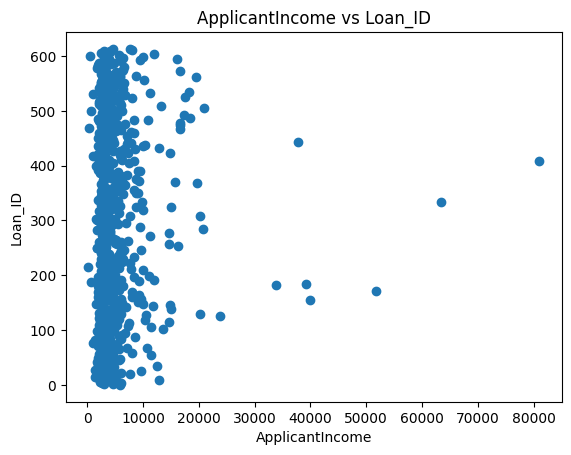

In [ ]:
#Loan_ID vs ApplicantIncome scatterplot
plt.scatter(data['ApplicantIncome'],data['Loan_ID'])
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_ID')
plt.title('ApplicantIncome vs Loan_ID')
plt.show()

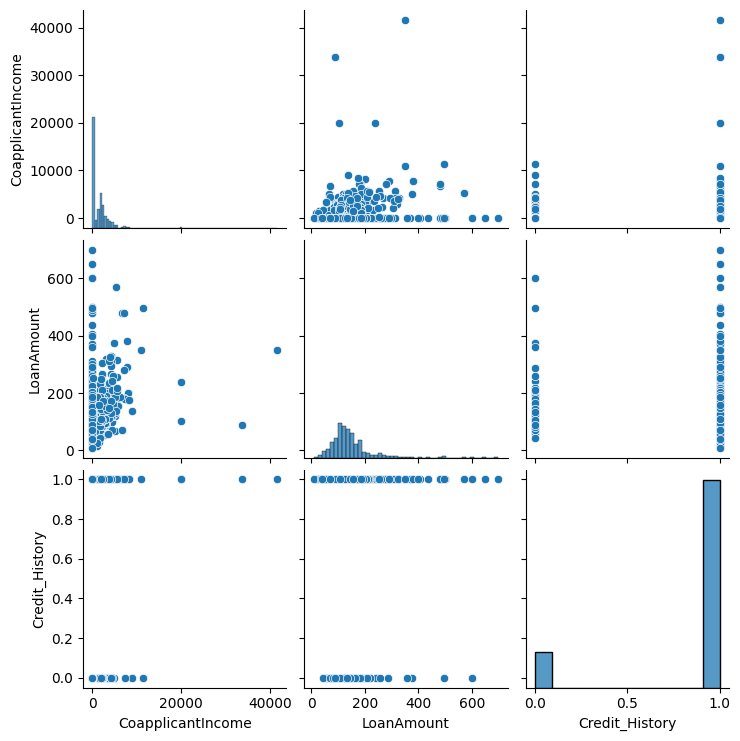

In [54]:
#Airplot
sns.pairplot(data[['CoapplicantIncome','LoanAmount','Credit_History']])
plt.show()

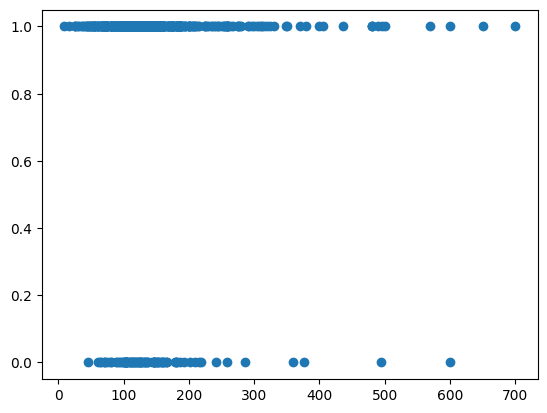

In [53]:
plt.scatter(data['LoanAmount'],data['Credit_History'])
plt.show()

In [66]:
#finding index of outliers
data[data['LoanAmount']>300].index

Index([], dtype='int64')

In [69]:
#dropping outliers
data.drop([  9,  21,  34,  67, 126, 130, 155, 171, 177, 258, 260, 278, 308, 325,
       333, 351, 369, 372, 409, 432, 487, 506, 514, 523, 525, 536, 561, 600,
       604],inplace = True)

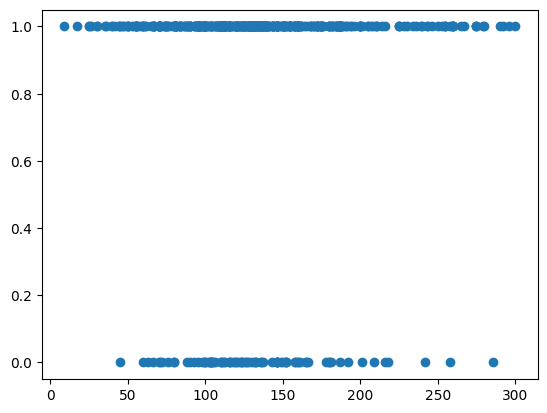

In [59]:
plt.scatter(data['LoanAmount'],data['Credit_History'])
plt.show()

#Scaling

In [63]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [64]:
print(data.head())

   Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0        0         0.302965          -0.632338    0.277256          0.271799   
1        1        -0.039619           0.006766   -0.084944          0.271799   
2        2        -0.467985          -0.632338   -1.304596          0.271799   
3        3        -0.580827           0.367004   -0.242319          0.271799   
4        4         0.343826          -0.632338    0.170789          0.271799   

   Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  ...  \
0             1.0          False         True        True        False  ...   
1             1.0          False         True       False         True  ...   
2             1.0          False         True       False         True  ...   
3             1.0          False         True       False         True  ...   
4             1.0          False         True        True        False  ...   

   Self_Employed_Yes  Property_Area_Rural  P